# Microeconometrics Project - Are Credit Markets Still Local? Evidence from Bank Branch Closings. 

## Introduction
Scope of this Project is to replicate a the study **"Are Credit Markets Still Local? Evidence from Bank Branch Closings."** written by **Hoai-Luu Q. Nguyen**  published in *AMERICAN ECONOMIC JOURNAL: APPLIED ECONOMICS VOL. 11, NO. 1, JANUARY 2019*. <br> <br>

Data and Stata-files are provided by the American Economic Association:<br>
<href>https://www.aeaweb.org/articles?id=10.1257/app.20170543</href><br>



**Hyothesis:** Does the distance to bank branches effect credit allocation?<br>

**Identification Issue:** Openings and closings of bank branches are not random assignments<br>

**Idea:** Using the impact of post-merger branch closings to measure the effect on lending <br>
          => *Key assumption:* merger decision is exogenous to local economic conditions (census tract)
          
**Data:**

        * census tract -> macro- and household data on tract level
        * Summary of Deposits -> branch data
        * Report of Changes -> merger and branch closing 
        * HMDA and CRA -> lending data
        
**Method:** 

        1. IV – “exposure to post-merger consolidation” as instrument for closings
	    2. DiD – to compare lending in exposed and control (census) tracts in the same county 

*Why does the author use two methods? - to allow for heterogeneity across tracts within a county (DiD)*

## Abstract
*This paper studies whether distance shapes credit allocation by estimating the impact of bank branch closings during the 2000s on local access to credit. To generate plausibly exogenous variation in the incidence of closings, I use an instrument based on within-county, tract-level variation in exposure to post-merger branch consolidation. Closings lead to a persistent decline in local small business lending. Annual originations fall by 453K USD after a closing, off a baseline of 4.7 million USD, and remain depressed for up to 6 years. The effects are very localized, dissipating within 6 miles, and are especially severe during the financial crisis.*

## Data and Methodology
The Author uses three main data sources. First, as the main source she uses the *census tract* published by the US Census Bureau. This tracts vary in size across different regions, while containing 4000 inhabitans. <br>
Second as to instrument exposure, she uses the data from the FDIC called *Summary of Deposits (SOD)*. This data set provides data on branches e.g. location, deposists, latitude and longitude. <br> 
Finally, data on merger activity and branch closings is provided by FDIC *Report of Changes*. Further data on loans and lenders is provided by the FFIEC *Home Mortgage Disclosure Act (HMDA)* and *Community Reinvestment Act (CRA)*<br>
Macroeconomic data is used from the *National Establishment Time-Series (NETS)* by Walls and Associates.<br> 
Datasets are merged on bank- and tract-level by using **GIS** software to map locations. 
In the end the sample consists of tracts based on exposure to large bank mergers. Data are for the 1999-2012 period. <br> <br>

In the first step the author tests whether branch closing affects local credit supply.
Since we can not rule out potential simultaneity issues between branch closing and credit supply, the athor uses an IV approach.
$$\text{Close}_{it} = \kappa_i + \psi_t + \rho X_{it} + \beta_e \text{Expose}_{it} + \omega_{it}$$
$$ y_{it} = \alpha_i + \gamma_t + \lambda X_{it} + \beta_c \text{Close}_{it} + \epsilon_{it} $$
Further to address the issue that the decision for a merger is not turely exogenous Nguyen expands her anaylsis by an Difference-in-Differences Approach. To compare tracts who experienced a merger and tracts without (treated and control tracts/groups) within a county. 
$$y_{icmt} = \alpha_i + (\gamma_t \times \sigma_c) + X_i \beta_t + \sum_{\tau} \delta_{\tau} (D_{mt}^{\tau} \times \text{Expose}_{icm}) + \epsilon_{icmt}$$
Where tract $i$ in county $c$ experienced merger $m$ in year $t$. $D_{mt}^{\tau}$ is a dummy variable equals one in year $t$ and $\tau$ years after merger $m$ is approved. The reduced model is independent of $\tau$, thus:
$$y_{icmt} = \alpha_i + (\gamma_t \times \sigma_c) + X_i \beta_t + \delta_{\text{POST}} (\text{POST}_{mt} \times \text{Closure}_{icm}) + \epsilon_{icmt}$$

## Causal Graph and Identification Issues

### Causal Graph 

![](graphs/causal_graph.png)

    * D - treatment variable "bank branch closings"
    * Y - dependend variable "lending activity"
    * X - bank specific controls
    * E - general economic controls
    * L - local economic controls
    * M - instrument "merger activity"
    * U - unobserved drivers of lending activity

### Identification 
The causal graph above pins down the relationships between banking and lending. There are multiple collider varibales, backdoorpaths, confounding varibales and reverse causality issues need to be solved to show causality. 

First consider our variable of interest, lending activiy. Since credit is an equilibirum concept, 
its very difficult to disentangle whether a change in lending activity is diven by a change in credit demand or supply. Second our treatment variable, bank branch closings, has an issue of reverse causality with lending activity. One can argue, that less demand for credit is affecting banks decision to close a branch in a certain location. While, we are testing whether the closing of a branch in a certain location affects credit availibility. This issues, can be solved by instrumenting bank branch closing with merger activity. The author argues, that the decision to close a branch after a merger is more driven by merger activity less then by local demand of lending. By controlling for bankspecific characteristics and general economic conditions the backdoor paths over $X$ and $E$ are blocked. Thus, the exogeneity and relevance conditions should be fullfilled.

Finally, two backdoorpaths need to be blocked. Which is done by controlling for general- ($E$) and local economic ($L$) conditions.

Since tracts and counties are differ in various characteristics, a concern on heterogeneity across tracts arises. The IV-approach is not able to control for such unobserved time invariante individual tract characteristics. Therefore the author expands the analysis by a difference in differences approach (DiD). This panel data method allows to account for heterogeneity. The idea is to compair treated and non-treated tracts within a county, while controlling for tract fixed-effects. General economic conditions within a county should be compairable, such that heterogeneity is not driving the results anymore. 

In [6]:
%reset -f
%clear
%load_ext autoreload

# preface loading packages required for Python Data Science
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from patsy import dmatrices
import matplotlib.pyplot as plt
from scipy import stats
import warnings
from auxiliary import *
from linearmodels import PanelOLS
from linearmodels.iv import IV2SLS

%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Replication of Summary Stats

In [2]:
# Table 1: Merger Sample
print(tab1().to_string(index=False))

                                   Buyer                                             Target  Year approved
 Manufacturers and Traders Trust Company                                      Allfirst Bank           2003
   Bank of America, National Association                                Fleet National Bank           2004
                      National City Bank                                 The Provident Bank           2004
                            Regions Bank          Union Planters Bank, National Association           2004
                     JPMorgan Chase Bank                     Bank One, National Association           2004
                         North Fork Bank                                    GreenPoint Bank           2004
                           SunTrust Bank                          National Bank of Commerce           2004
     Wachovia Bank, National Association                                    SouthTrust Bank           2004
                          Sovereign B

In [3]:
# Table 2: Merger Sammary Statistics
print(tab2().to_string(index=False))

               Variable   Median       Min         Max
           Total assets 81954710  25963401  1252402412
               Branches      696       254        5569
    States of operation        8         1          31
 Countries of operation      182        18         692
           Total assets 25955711  10426963   245783000
               Branches      277        28        1482
    States of operation        6         1          13
 Countries of operation       54         7         202


In [4]:
# todo add standard devidations in brackets
# Table 3: Summary Statistics for Exposed and Control Tracts
pd.options.display.float_format = '{:.3f}'.format
print(tab3().to_string(index=False))

           Variable   Exposed  All other  p-value 01   Control  p-value 02
         popdensity  2575.407   7206.310       0.000  6105.754       0.000
             poptot  5761.404   4571.781       0.000  5387.571       0.013
          medincome 44223.772  45451.951       0.304 52171.479       0.000
          pminority     0.211      0.386       0.000     0.238       0.039
           pcollege     0.309      0.256       0.000     0.341       0.002
          pmortgage     0.688      0.708       0.014     0.721       0.000
            pincome   114.473    101.963       0.000   118.616       0.149
 cont_totalbranches     5.849      1.141       0.000     3.816       0.000
      cont_brgrowth     0.053      0.030       0.011     0.065       0.185
   cont_NumSBL_Rev1   103.400     54.335       0.000    88.947       0.000
  cont_total_origin   277.220    227.091       0.000   281.016       0.723
                Obs   386.000  18027.000         nan  3087.000         nan


In [5]:
# Table 4: Representativeness of the Merger Sample
pd.options.display.float_format = '{:.3f}'.format
print(tab4().to_string(index=False))

      Variable       All  Closings    Merger
    popdensity  4032.403  3615.265  6166.240
        poptot  4687.897  4941.796  5401.217
     medincome 44829.351 45248.801 51803.494
     pminority     0.195     0.197     0.234
      pcollege     0.247     0.272     0.337
     pmortgage     0.668     0.684     0.716
 totalbranches     2.611     3.893     4.095
      brgrowth     0.125     0.153     0.071
   NumSBL_Rev1    89.156   106.479    91.880
  total_origin   317.562   342.827   281.857
       pincome   104.267   106.273   119.300
           Obs 37041.000  7768.000  3003.000


In [6]:
# Table 5: Complier Characteristics
pd.options.display.float_format = '{:.3f}'.format
print(tab5().to_string(index=False))

          Variables  ecomp  ratio
         popdensity 18.308  0.366
             poptot 57.533  1.151
          medincome 29.087  0.582
          pminority 60.262  1.205
           pcollege 47.011  0.940
          pmortgage 39.219  0.784
            pincome 41.426  0.829
 cont_totalbranches 86.497  1.730
      cont_brgrowth 49.612  0.992
   cont_NumSBL_Rev1 60.650  1.213
  cont_total_origin 48.051  0.961


## Replication of the Main Results

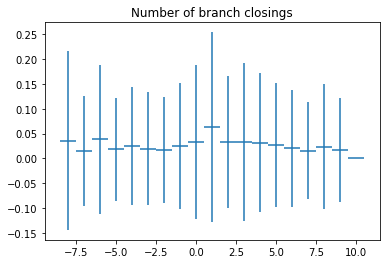

In [3]:
# Figure 2: Exposure to consolidation and the incidence of branch closings
mean=fig2()[0]
std=fig2()[1]
plt.errorbar(mean.index, mean, xerr=0.5, yerr=2*std, linestyle='')
plt.title('Number of branch closings')
plt.show()  

In [4]:
# To list results stored by statsmodels package
#dir(model)
#model.summary()

In [24]:
# Table 6: First-Stage and Reduced-Form estimates 
df = pd.read_stata('data/replication_input.dta')
df.drop_duplicates(keep='first', inplace=True)
df=df.assign(event_year=lambda df:df.year-df.yr_approve)
index=list(df)
df['group_timeID']= df.groupby(['state_fps', 'cnty_fps', 'year']).grouper.group_info[0]
df['indivID']= df.groupby(['state_fps', 'cnty_fps', 'tractstring']).grouper.group_info[0]
df['clustID']= df.groupby(['state_fps', 'cnty_fps']).grouper.group_info[0] 
dummy = pd.get_dummies(df['year'])
chars = ['poptot', 'popdensity', 'pminority', 'pcollege', 'medincome', 'pincome', 'cont_totalbranches', 'cont_brgrowth'] 
for i in chars:
    for j in range(1999,2014):
        name=i+str(j)
        df[name]=0
        df[name]=df[i].loc[df['year']==j]
        

df = df.fillna(0)
dftemp = df.filter(regex='poptot|popdensity|pminority|pcollege|medincome|pincome|cont_totalbranches|cont_brgrowth')
dftemp = dftemp.drop(chars, axis=1)  
controllist = list(dftemp)
controls = "+".join(controllist)
#temp = df.groupby([i, 'year']).grouper.group_info[0]       
dftest=df.copy()
dftest.set_index(['indivID', 'group_timeID'], inplace=True)

In [25]:
dftest['eDl']=0
dftest['eDl'].loc[(dftest['event_year']<-1) & dftest['overlap']==1]=1
for i in range(0,7):
    dum='eD'+str(i)
    dftest[dum]=0
    dftest[dum].loc[(dftest['event_year']==i) & dftest['overlap']==1]=1

dftest['eDu']=0
dftest['eDu'].loc[(dftest['event_year']>6) & dftest['overlap']==1]=1
dummylist=list(dftest.filter(regex='eD'))
dummies="+".join(dummylist)
#model = 'num_closings ~ C(indivID)+C(group_timeID)+'+controls+'+'+dummies
exog = dummylist + controllist

#mod = PanelOLS(dftest.num_closings, dftest[exog], entity_effects=True, time_effects=True)
#res = mod.fit(cov_type='clustered', cluster_entity=True)

#dftest.to_csv('test_csv.csv')
#print(res.params)
dftest.head()

state_fps  cnty_fps  mergerID   approved  acq_instname  \
indivID group_timeID                                                           
0       0                   1.0       3.0      49.0 2006-10-20  Regions Bank   
        1                   1.0       3.0      49.0 2006-10-20  Regions Bank   
        2                   1.0       3.0      49.0 2006-10-20  Regions Bank   
        3                   1.0       3.0      49.0 2006-10-20  Regions Bank   
        4                   1.0       3.0      49.0 2006-10-20  Regions Bank   

                      out_instname  yr_approve tractstring  overlap    year  \
indivID group_timeID                                                          
0       0             AmSouth Bank      2006.0         105      1.0  1999.0   
        1             AmSouth Bank      2006.0         105      1.0  2000.0   
        2             AmSouth Bank      2006.0         105      1.0  2001.0   
        3             AmSouth Bank      2006.0         105      1.0  2002.0   
        4             AmSouth Bank      2006.0         105      1.0  2003.0   

                      ...  cont_brgrowth2013  eDl  eD0  eD1  eD2  eD3  eD4  \
indivID group_timeID  ...                                                    
0       0             ...                0.0    1    0    0    0    0    0   
        1             ...                0.0    1    0    0    0    0    0   
        2             ...                0.0    1    0    0    0    0    0   
        3             ...                0.0    1    0    0    0    0    0   
        4             ...                0.0    1    0    0    0    0    0   

                      eD5  eD6  eDu  
indivID group_timeID                 
0       0               0    0    0  
        1               0    0    0  
        2               0    0    0  
        3               0    0    0  
        4               0    0    0  

[5 rows x 171 columns]

In [26]:
## estimates of column 1 (number of closings)
est_numclose= pd.DataFrame(columns=['beta', 'SE'], index=range(-1, 8))
beta=pd.DataFrame(index=range(-1, 8))
std=pd.DataFrame(index=range(-1, 8))
for i in range(-1, 8):
    df['D'] = 0
    df.loc[df['event_year'] >= i , 'D'] = 1
    temp=df.loc[(df['event_year']==i) & df['overlap']==1]
    model = smf.ols(formula='num_closings ~ D + C(indivID) + C(group_timeID)+'+ controls, data=temp).fit()
    #model = smf.ols(formula='num_closings ~ D + popdensity + poptot + medincome + pminority + pcollege +  cont_totalbranches + cont_brgrowth + C(indivID) + C(group_timeID)', data=temp).fit(cov_type='cluster', cov_kwds={'groups': df['clustID']})
    #print(model.summary())
    beta[i]=model.params['D']
    std[i]=model.HC0_se['D']
pd.options.display.float_format = '{:.3f}'.format
est_numclose['beta']=beta.T
est_numclose['SE']=std.T

In [27]:
## estimates of column 2 (total branches)
est_totalbranches= pd.DataFrame(columns=['beta', 'SE'], index=range(-1, 8))
beta=pd.DataFrame(index=range(-1, 8))
std=pd.DataFrame(index=range(-1, 8))
for i in range(-1, 8):
    df['D'] = 0
    df.loc[df['event_year'] >= i , 'D'] = 1
    temp=df.loc[(df['event_year']==i) & df['overlap']==1]
    model = smf.ols(formula='totalbranches ~ D + C(indivID) + C(group_timeID)+'+controls, data=temp).fit()
    #print(model.summary())
    beta[i]=model.params['D']
    std[i]=model.HC0_se['D']
pd.options.display.float_format = '{:.3f}'.format
est_totalbranches['beta']=beta.T
est_totalbranches['SE']=std.T

In [28]:
## estimates of column 3 (SBL origin)
est_SBLorigin= pd.DataFrame(columns=['beta', 'SE'], index=range(-1, 8))
beta=pd.DataFrame(index=range(-1, 8))
std=pd.DataFrame(index=range(-1, 8))
for i in range(-1, 8):
    df['D'] = 0
    df.loc[df['event_year'] >= i , 'D'] = 1
    temp=df.loc[(df['event_year']==i) & df['overlap']==1]
    model = smf.ols(formula='NumSBL_Rev1 ~ D + C(indivID) + C(group_timeID)+'+controls, data=temp).fit()
    #print(model.summary())
    beta[i]=model.params['D']
    std[i]=model.HC0_se['D']
pd.options.display.float_format = '{:.3f}'.format
est_SBLorigin['beta']=beta.T
est_SBLorigin['SE']=std.T

In [29]:
## estimates of column 4 (Mortgage origin)
est_Morigin= pd.DataFrame(columns=['beta', 'SE'], index=range(-1, 8))
beta=pd.DataFrame(index=range(-1, 8))
std=pd.DataFrame(index=range(-1, 8))
for i in range(-1, 8):
    df['D'] = 0
    df.loc[df['event_year'] >= i , 'D'] = 1
    temp=df.loc[(df['event_year']==i) & df['overlap']==1]
    model = smf.ols(formula='total_origin ~ D  + C(indivID) + C(group_timeID)+'+controls, data=temp).fit()
    #print(model.summary())
    beta[i]=model.params['D']
    std[i]=model.HC0_se['D']
pd.options.display.float_format = '{:.3f}'.format
est_Morigin['beta']=beta.T
est_Morigin['SE']=std.T

In [30]:
## finish table 6 by producing a df containing all estimates
df_t= pd.DataFrame(columns=['delta', 'Num_closings', 'Total_branches', 'SBL_origin', 'Mortgage_origin'], index=range(-1, 8))
df_t['Num_closings']      = est_numclose['beta']
df_t['Total_branches']    = est_totalbranches['beta']
df_t['SBL_origin']        = est_SBLorigin['beta']
df_t['Mortgage_origin']   = est_Morigin['beta']
df_t['delta']=['<-1','0','1','2','3','4','5','6','>6']
print('estimated effect:','\n \n', df_t.to_string(index=False))

df_tse= pd.DataFrame(columns=['delta', 'Num_closings', 'Total_branches', 'SBL_origin', 'Mortgage_origin'], index=range(-1, 8))
df_tse['Num_closings']      = est_numclose['SE']
df_tse['Total_branches']    = est_totalbranches['SE']
df_tse['SBL_origin']        = est_SBLorigin['SE']
df_tse['Mortgage_origin']   = est_Morigin['SE']
df_tse['delta']=['<-1','0','1','2','3','4','5','6','>6']
print('\n \n','estimated std:','\n \n', df_tse.to_string(index=False))

estimated effect: 
 
 delta  Num_closings  Total_branches  SBL_origin  Mortgage_origin
  <-1         0.019           0.004      24.230           83.808
    0         0.166          -0.060      24.891           43.479
    1         0.154          -0.539      31.360           71.368
    2         0.034          -0.727      30.545           38.234
    3        -0.066           0.382      24.253            0.322
    4        -0.054           0.462       9.850          -22.574
    5        -0.087           0.561      -8.736          -33.090
    6        -0.007           0.610      -8.107          -30.923
   >6        -0.065           0.285       0.657          -37.022

 
 estimated std: 
 
 delta  Num_closings  Total_branches  SBL_origin  Mortgage_origin
  <-1         0.000           0.000       0.000            0.000
    0         0.000           0.000       0.000            0.000
    1         0.000           0.000       0.000            0.000
    2         0.000           0.000       0.0

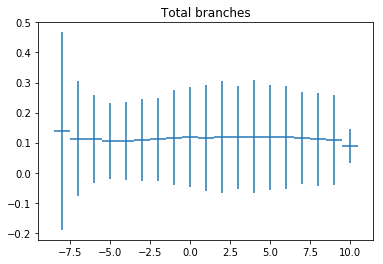

In [5]:
# Figure 3: Exposure to consolidation and local branch levels
mean=fig3()[0]
std=fig3()[1]
plt.errorbar(mean.index, mean, xerr=0.5, yerr=2*std, linestyle='')
plt.title('Total branches')
plt.show()  

Text(0.5, 1.0, 'New Mortgages')

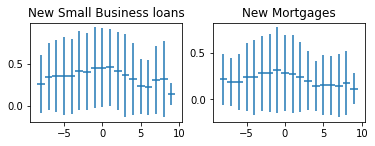

In [2]:
# Figure 4: Exposure to consolidation and the volume of new lending
mean1=fig4()[0]
std1=fig4()[1]
mean2=fig4()[2]
std2=fig4()[3]
plt.figure()
plt.subplot(2,2,1)
plt.errorbar(mean1.index, mean1, xerr=0.5, yerr=2*std1, linestyle='')
plt.title('New Small Business loans')
#plt.show() 
plt.subplot(2,2,2)
plt.errorbar(mean2.index, mean2, xerr=0.5, yerr=2*std2, linestyle='')
plt.title('New Mortgages')
#plt.show() 

Text(0.5, 1.0, 'New Mortgages')

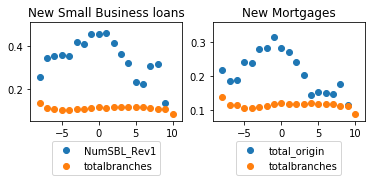

In [7]:
# Figure 5: The effect of subsequent bank entry on local credit supply
plt.figure()
# Hide warnings
warnings.filterwarnings("ignore")

## Small Business Lending
df = pd.read_stata('data/replication_input.dta')
df.drop_duplicates(keep='first', inplace=True)
df=df.assign(event_year=lambda df:df.year-df.yr_approve)
index=list(df)
dfmean = pd.DataFrame(columns=range(-8, 10), index=index)
#df['NumSBL_Rev1']=(df['NumSBL_Rev1']-df['NumSBL_Rev1'].mean())/df['NumSBL_Rev1'].std()
df['NumSBL_Rev1']=(df['NumSBL_Rev1']-df['NumSBL_Rev1'].min())/(df['NumSBL_Rev1'].max()-df['NumSBL_Rev1'].min())
df['totalbranches']=(df['totalbranches']-df['totalbranches'].min())/(df['totalbranches'].max()-df['totalbranches'].min())
for i in range(-8, 11):
    dfmean[i]=df.loc[(df['event_year']==i) & df['overlap']==1].mean()
dfmean=dfmean.T
mean=dfmean['NumSBL_Rev1']
plt.subplot(2,2,1)
plt.scatter(mean.index, mean)
plt.subplot(2,2,1)
plt.scatter(mean.index, dfmean['totalbranches'])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.title('New Small Business loans')
#plt.show() 

## Mortgages
df = pd.read_stata('data/replication_input.dta')
df.drop_duplicates(keep='first', inplace=True)
df=df.assign(event_year=lambda df:df.year-df.yr_approve)
index=list(df)
dfmean = pd.DataFrame(columns=range(-8, 10), index=index)
#df['total_origin']=(df['total_origin']-df['total_origin'].mean())/df['total_origin'].std()
df['total_origin']=(df['total_origin']-df['total_origin'].min())/(df['total_origin'].max()-df['total_origin'].min())
df['totalbranches']=(df['totalbranches']-df['totalbranches'].min())/(df['totalbranches'].max()-df['totalbranches'].min())
for i in range(-8, 11):
    dfmean[i]=df.loc[(df['event_year']==i) & df['overlap']==1].mean()
dfmean=dfmean.T
mean=dfmean['total_origin']
plt.subplot(2,2,2)
plt.scatter(mean.index, mean)
plt.subplot(2,2,2)
plt.scatter(mean.index, dfmean['totalbranches'])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))
plt.title('New Mortgages')
#plt.show() 

In [46]:
# Table 7: IV-Estimates of the effect of closings an local credit supply
df = pd.read_stata('data/replication_input.dta')
df.drop_duplicates(keep='first', inplace=True)
df=df.assign(event_year=lambda df:df.year-df.yr_approve)
index=list(df)
df['close_2yr']=0
df['close_2yr']=df['closed_branch'].loc[(df.event_year==0) | (df.event_year==1)]
df['close_2yr'].fillna(0, inplace=True)
df['POST']=df['event_year'].loc[df.event_year>0]
df['POST_close']=df.POST * df.close_2yr
df['POST_expose']= df.POST * df.overlap 

df['group_timeID']= df.groupby(['state_fps', 'cnty_fps', 'year']).grouper.group_info[0]
df['indivID']= df.groupby(['state_fps', 'cnty_fps', 'tractstring']).grouper.group_info[0]
df['clustID']= df.groupby(['state_fps', 'cnty_fps']).grouper.group_info[0] 

dummy = pd.get_dummies(df['year'])
chars = ['poptot', 'popdensity', 'pminority', 'pcollege', 'medincome', 'pincome', 'cont_totalbranches', 'cont_brgrowth'] 
for i in chars:
    for j in range(1999,2014):
        name=i+str(j)
        df[name]=0
        df[name]=df[i].loc[df['year']==j]
        
dftemp = df.filter(regex='poptot|popdensity|pminority|pcollege|medincome|pincome|cont_totalbranches|cont_brgrowth')
dftemp = dftemp.drop(chars, axis=1)  
controllist = list(dftemp)
controls = "+".join(controllist)
df[controllist] = df[controllist].fillna(0)
#df.set_index(['indivID', 'group_timeID'], inplace=True)

In [47]:
#pd.options.display.max_columns = df.shape[1]

#model1 = smf.ols(formula='NumSBL_Rev1 ~ POST_close + C(indivID) + C(group_timeID)+'+controls, data=df).fit()
#print(model1.params['POST_close']) THE RESULT: 3.00338 BUT should be -2.143

# Idea: try to implement within transformation
#df['NumSBL_Rev1_T']=df.groupby('indivID')['NumSBL_Rev1']-df.groupby('indivID')['NumSBL_Rev1'].sum()/df.groupby('indivID')['indivID'].count()
#model1 = smf.ols(formula='NumSBL_Rev1_T ~ POST_close + C(group_timeID)+'+controls, data=df).fit()
#print(model1.params['POST_close'])

# Again Try PanelOLS package
inID = pd.Categorical(df.indivID)
grID = pd.Categorical(df.group_timeID)
df = df.set_index(['indivID', 'group_timeID'])
df['inID'] = inID
df['grID'] = grID
exog_vars = controllist
exog_vars.append('POST_close')
exog = sm.add_constant(df[exog_vars])
#mod = PanelOLS(df.NumSBL_Rev1, exog)
#re_res = mod.fit()
#print(re_res)

## Simulation Study

The general idea of this section is to test the identification framework with a stylized simulated Dataset. 

In [14]:
np.random.seed(123)
df=panel_sample()
df.to_csv('panel_sample.csv')
df['DD']=df.M*df.Exp

mod = PanelOLS(df.Y, df['D'], entity_effects=True, time_effects=True)
res = mod.fit(cov_type='clustered', cluster_entity=True)
print('The naiv approach, which should be biased \n Estimated effect: %2.4f and std. error: %2.4f' %(res.params,res.std_errors))

#mod = IV2SLS.from_formula('Y ~ [D ~ Exp]', data=df)
#res = mod.fit(cov_type='clustered', cluster_entity=True)
#print('The naiv IV approach, which should be biased \n Estimated effect: %2.4f and std. error: %2.4f' %(res.params,res.std_errors))

mod = PanelOLS(df.Y, df['DD'], entity_effects=True, time_effects=True)
res = mod.fit(cov_type='clustered', cluster_entity=True)
print('The reduced form (DD) with merger as instrument \n Estimated effect: %2.4f and std. error: %2.4f' %(res.params,res.std_errors))

mod = PanelOLS(df.Y, df[['DD','X','L','E']], entity_effects=True, time_effects=True)
res = mod.fit(cov_type='clustered', cluster_entity=True)
print('The reduced form (DD) with merger as instrument and control variables \n Estimated effect: %2.4f and std. error: %2.4f' %(res.params[0],res.std_errors[0]))
print('Note: the true effect is 0.5 thus the authors framework should yield reliable results')

The naiv approach, which should be biased 
 Estimated effect: 1.9067 and std. error: 0.0051
The reduced form (DD) with merger as instrument 
 Estimated effect: 0.4815 and std. error: 0.0515
The reduced form (DD) with merger as instrument and control variables 
 Estimated effect: 0.4812 and std. error: 0.0515
Note: the true effect is 0.5 thus the authors framework should yield reliable results


## References

*Degryse, H., & Ongena, S. (2005). Distance, lending relationships, and competition. The Journal of Finance, 60(1), 231-266.*

*Frölich, M., & Sperlich, S. (2019). Impact evaluation. Cambridge University Press.*

*Nguyen, H. L. Q. (2019). Are credit markets still local? evidence from bank branch closings. American Economic Journal: Applied Economics, 11(1), 1-32.*

*Petersen, M. A., & Rajan, R. G. (2002). Does distance still matter? The information revolution in small business lending. The journal of Finance, 57(6), 2533-2570.*

*Wooldridge, J. M. (2015). Introductory econometrics: A modern approach. Nelson Education.*